# Ozone Data Gathering (sample station: BETN073)

### Plain txt file to dataframe

Background-rural both for Ozone (O3 - Max daily 8-hour mean *max8h* ozone concentrations) is being read from disk as a CSV file (Older database: https://www.eea.europa.eu/data-and-maps/data/airbase-the-european-air-quality-database-7) for the station "BETN073:43N073 - VEZIN" in Belgium.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from datetime import timedelta

fname = "AirBase_BE_v7/BETN073/BETN0730000700100dymax.1-1-1990.31-12-2011"

columnNames = ['month']
for i in range(1,32):  # First column is sensor reading, second is validity of day (1 == OK, 0, -1 = NOT OK)
    columnNames.append(str(i))
    columnNames.append('validity{}'.format(i))

df1 = pd.read_csv(fname, sep='\t', names=columnNames, lineterminator='\n')
df1['month'] = pd.to_datetime(df1['month'])

### Daily time-series (from 1-1-1990 to 31-12-2011)
Initialization of an empty multi-variate time-series frame.
*Note:'Var1' is added as a placeholder for future time-series data augmentation (with weather data for a station).*

In [3]:
minDate = min(df1['month'])
maxDate = max(df1['month']) + timedelta(days=30) # Add 30 days to December 1st
#ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3', 'Var1'])
ts = pd.DataFrame(np.nan, index=pd.date_range(start=minDate, end=maxDate, freq='D'), columns=['O3'])
print ("Min date: {}, Max Date: {}".format(minDate, maxDate))

Min date: 1990-01-01 00:00:00, Max Date: 2011-12-31 00:00:00


### Filling empty ts with O3 data (Valid readings: {0}, invalid readings {-1, 0} as Nans)
Only valid ozone data is inserted into the time-series.

In [4]:
for row in df1.itertuples(index=True, name='df1'): # Foreach month
    date = row[1]
    for columnIndex in range(1, df1.shape[1]): # Foreach day
        if columnIndex % 2 == 0: # Even column
            if row[columnIndex + 1] == 1: # If sensor reading valid
                currentDate = date + timedelta(days=((columnIndex - 2) / 2)) # Get year-month-day           
                ts.at[currentDate, 'O3'] = row[columnIndex] # Set value to time-series

### First month data
CSV vs time-series data-frame (first 31 days of January 1990).

In [5]:
# First 31 dayCSV vs time-series data-frame (last month).s of CSV data
df1.head(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
0,1990-01-01,48.714,0,7.0,0,34.333,0,12.714,1,14.5,...,77.5,1,81.286,1,62.875,1,60.667,1,65.5,1


In [6]:
# First 31 days of time-series data
ts.head(31)

,O3
1990-01-01,NaN
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,12.714
1990-01-05,14.500
1990-01-06,23.143
1990-01-07,NaN
1990-01-08,20.625
1990-01-09,36.750
1990-01-10,54.571


### Last month data
CSV vs time-series data-frame (31 days of December 2011).

In [7]:
# Last 31 days of CSV data
df1.tail(1)

,month,1,validity1,2,validity2,3,validity3,4,validity4,5,...,27,validity27,28,validity28,29,validity29,30,validity30,31,validity31
263,2011-12-01,37.5,1,49.875,1,50.062,1,56.857,1,58.312,...,52.375,1,39.0,1,57.357,0,61.938,1,40.786,1


In [8]:
# Last 31 days of time-series data
ts.tail(31)

,O3
2011-12-01,37.500
2011-12-02,49.875
2011-12-03,50.062
2011-12-04,56.857
2011-12-05,58.312
2011-12-06,52.500
2011-12-07,55.688
2011-12-08,55.438
2011-12-09,61.938
2011-12-10,50.250


Histogram (50 bins) and boxplot of all the O3 values of the first year. There seem to be two outliers.

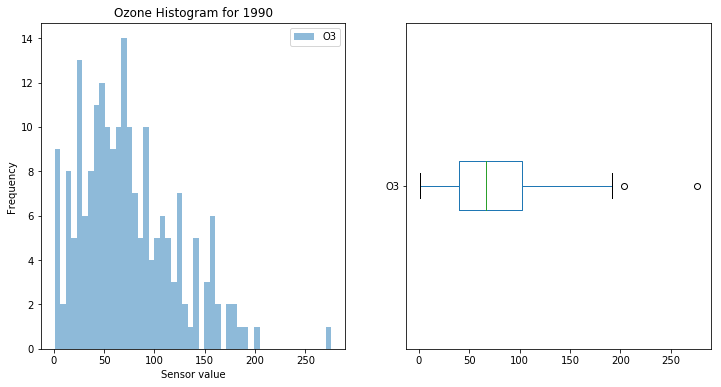

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].set_xlabel('Sensor value')
ax[0].set_title('Ozone Histogram for 1990')
ax[0].grid(True)
ts.head(365).plot.hist(alpha=0.5, bins=50, ax = ax[0]);
ts.head(365).plot.box(vert=False, ax = ax[1]);

Some basic descriptive statistics for 1990:

In [10]:
from pandas.plotting import table

#fig, ax = plt.subplots(1, 1)
#table(ax, np.round(ts.head(365).describe(), 2),loc='upper right', colWidths=[0.2, 0.2, 0.2])
#ts.head(365).plot(ax=ax, ylim=(0, 2), legend=None)
ts.head(365).describe()

,O3
count,206.000000
mean,73.911083
std,47.328933
min,1.125000
25%,40.294750
50%,67.083500
75%,102.125000
max,275.833000


Time-series plot of O3, first 365 days (1990, with missing data):

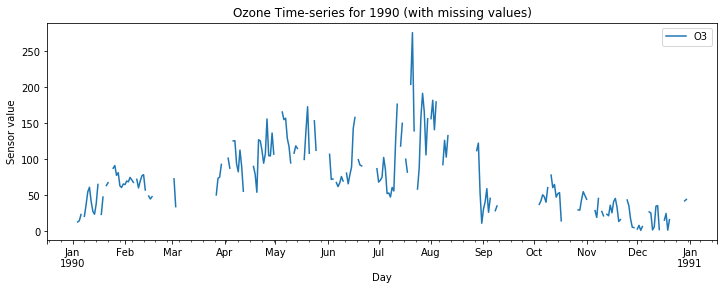

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
ax.set_ylabel('Sensor value')
ax.set_xlabel('Day')
ax.set_title('Ozone Time-series for 1990 (with missing values)')
ax.grid(True)
ts.head(365).plot(ax = ax);

Not useful interpolations: Cubic and Spline (order 2-5+) seem to have very high leverage, skewing the original data:

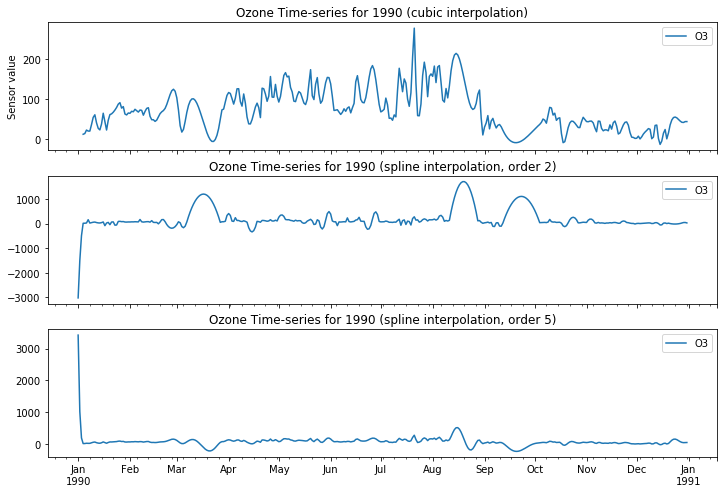

In [12]:
ts2a = ts.interpolate(method='cubic',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='spline',order=2,limit=20,limit_direction='both')
ts2c = ts.interpolate(method='spline',order=5,limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=False)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[0].set_title('Ozone Time-series for 1990 (cubic interpolation)')
ax[1].set_title('Ozone Time-series for 1990 (spline interpolation, order 2)')
ax[2].set_title('Ozone Time-series for 1990 (spline interpolation, order 5)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

Useful interpolations: 'from_derivatives' (piecewise polynomial interpolation) and linear. (Probably) the most interesting interpolation: PCHIP 1-d monotonic cubic interpolation (see:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.PchipInterpolator.html#scipy.interpolate.PchipInterpolator). Compared to the plain cubic interpolation, doesn't seem to skew the original data points. Pchip looks similar to the linear interpolation, with some extra smoothing.

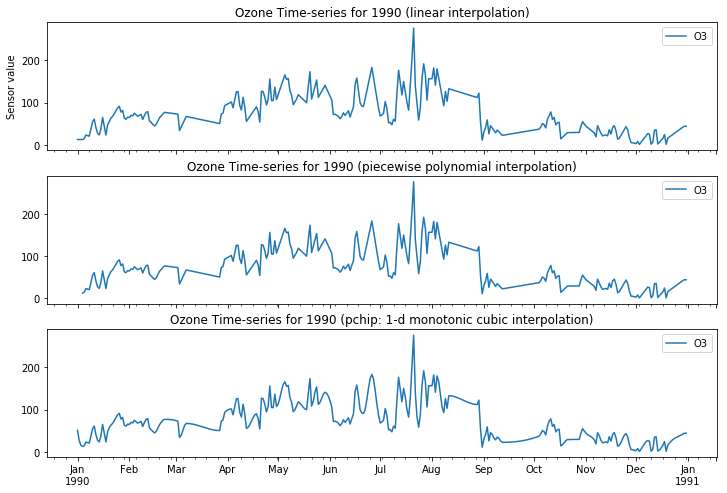

In [15]:
ts2a = ts.interpolate(method='linear',limit=20,limit_direction='both')
ts2b = ts.interpolate(method='from_derivatives',limit=20,limit_direction='both')
ts2c = ts.interpolate(method='pchip',limit=20,limit_direction='both')
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12, 8), sharex=True, sharey=True)
ax[0].set_ylabel('Sensor value')
ax[0].set_xlabel('Day')
ax[1].set_title('Ozone Time-series for 1990 (piecewise polynomial interpolation)')
ax[2].set_title('Ozone Time-series for 1990 (pchip: 1-d monotonic cubic interpolation)')
ax[0].set_title('Ozone Time-series for 1990 (linear interpolation)')
ts2a.head(365).plot(ax = ax[0]);
ts2b.head(365).plot(ax = ax[1]);
ts2c.head(365).plot(ax = ax[2]);

# Meta-data for all O3 stations

Reading the 'BE-meta.xml' file, for the stations in Belgium.
All the available XML tags:

In [2]:
import re, collections
from lxml import etree
import xml.etree.ElementTree as ET

tree = ET.parse('BE_meta.xml')
root = tree.getroot()
xml = ET.tostring(root, encoding='utf8', method='xml')
 
xml_root = etree.fromstring(xml)
raw_tree = etree.ElementTree(xml_root)
nice_tree = collections.OrderedDict()
 
for tag in xml_root.iter():
    path = re.sub('\[[0-9]+\]', '', raw_tree.getpath(tag))
    if path not in nice_tree:
        nice_tree[path] = []
    if len(tag.keys()) > 0:
        nice_tree[path].extend(attrib for attrib in tag.keys() if attrib not in nice_tree[path])            
 
for path, attribs in nice_tree.items():
    indent = int(path.count('/') - 1)
    print('{0}{1}: {2} [{3}]'.format('    ' * indent, indent, path.split('/')[-1], ', '.join(attribs) if len(attribs) > 0 else '-'))

0: airbase [{http://www.w3.org/2001/XMLSchema-instance}noNamespaceSchemaLocation]
    1: country [-]
        2: country_name [-]
        2: country_iso_code [-]
        2: country_eu_member [-]
        2: network [-]
            3: network_code [-]
            3: network_name [-]
            3: network_short_name [-]
            3: network_start_date [-]
            3: network_time_reference_basis [-]
            3: network_type [-]
            3: network_manager [-]
                4: organization [-]
                    5: organization_name [-]
                    5: organization_address [-]
                    5: organization_city [-]
                    5: organization_phone_number [-]
                    5: organization_fax_number [-]
                4: person [-]
                    5: person_last_name [-]
                    5: person_first_name [-]
        2: station [Id]
            3: station_european_code [-]
            3: network_info [-]
                4: network_code [-

List of all the measurement stations in Belgium:

In [3]:
for child in root:    
    for child1 in child:        
        print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))

tag: country_name, attrib: {}, text: BELGIUM
tag: country_iso_code, attrib: {}, text: BE
tag: country_eu_member, attrib: {}, text: Y
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: network, attrib: {}, text: 
			
tag: station, attrib: {'Id': 'BEMAT01:00AT01 - ANTWERPEN'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE01:00BE01 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE02:00BE02 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE06:00BE06 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE07:00BE07 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE08:00BE08 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE09:00BE09 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE10:00BE10 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE11:00BE11 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMBE15:00BE15 - BEERSE'}, text: 
			
tag: station, attrib: {'Id': 'BEMEK0

Example browsing the meta-data of the station 73 - VEZIN in Belgium:

In [4]:
for child in root:    
    for child1 in child:          
        if child1.tag == "station":
           # print ("tag: {}, attrib: {}, text: {}".format(child1.tag, child1.attrib, child1.text))
#             if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
            if child1.attrib['Id']=="BETN012:44N012 - MOERKERKE":  
                for child2 in child1:
#                     print ("tag: {}, attrib: {}, text: {}".format(child2.tag, child2.attrib, child2.text))
                    if child2.tag == "station_info":
                        for child3 in child2:
                            print ("tag: {}, attrib: {}, text: {}".format(child3.tag, child3.attrib, child3.text))
#                          if child2.attrib['component'] == "Ozone (air) - UV absorption":
#                             for child3 in child2:
#                                 if child3.tag == "statistics":
#                                     if child3.attrib['Year'] == "2010":
#                                         for child4 in child3:
#                                             if child4.tag == "statistics_average_group":
#                                                 if child4.attrib['value'] == "day":
#                                                     for child5 in child4:
#                                                         if child5.tag == "statistic_set":
#                                                             if child5.attrib['type'] == "General":
#                                                                 for child6 in child5:#                                                                     
#                                                                     if child6.tag == "statistic_result":                                                                        
#                                                                         print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
#                                                                         for child7 in child6:
#                                                                             print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))

tag: EMEP_station, attrib: {}, text: yes
tag: station_local_code, attrib: {}, text: 44N012
tag: station_airbase_code, attrib: {}, text: BE0033R
tag: station_name, attrib: {}, text: 44N012 - MOERKERKE
tag: station_nuts_level0, attrib: {}, text: BE
tag: station_nuts_level1, attrib: {}, text: 2
tag: station_nuts_level2, attrib: {}, text: 5
tag: station_nuts_level3, attrib: {}, text: 1
tag: sabe_country_code, attrib: {}, text: BE
tag: sabe_unit_code, attrib: {}, text: BE231006
tag: sabe_unit_name, attrib: {}, text: Damme
tag: station_start_date, attrib: {}, text: 1977-11-01
tag: station_latitude_decimal_degrees, attrib: {}, text: 51.255100
tag: station_longitude_decimal_degrees, attrib: {}, text: 3.361292
tag: station_latitude_dms, attrib: {}, text: +051°15'18.36"
tag: station_longitude_dms, attrib: {}, text: +003°21'40.65"
tag: station_altitude, attrib: {}, text: 3
tag: type_of_station, attrib: {}, text: Background
tag: station_type_of_area, attrib: {}, text: rural
tag: station_characteri

In [5]:
for child in root:    
    for child1 in child:          
        if child1.tag == "station":
            if child1.attrib['Id']=="BETN073:43N073 - VEZIN":
                for child2 in child1:
                    if child2.tag == "station_info ":
                        if child2.attrib['component'] == "Ozone (air) - UV absorption":
                            for child3 in child2:
                                if child3.tag == "statistics":
                                    if child3.attrib['Year'] == "2010":
                                        for child4 in child3:
                                            if child4.tag == "statistics_average_group":
                                                if child4.attrib['value'] == "day":
                                                    for child5 in child4:
                                                        if child5.tag == "statistic_set":
                                                            if child5.attrib['type'] == "General":
                                                                for child6 in child5:#                                                                     
                                                                    if child6.tag == "statistic_result":                                                                        
                                                                        print ("tag: {}, attrib: {}, text: {}".format(child6.tag, child6.attrib, child6.text))
                                                                        for child7 in child6:
                                                                            print ("tag: {}, attrib: {}, text: {}".format(child7.tag, child7.attrib, child7.text))